# Modeling Exercises

Clustering with the Iris Dataset

In [1]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
iris = data("iris")

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


Choose features other than the ones used in the lesson.

In [4]:
# Features used in walkthrough were petal_width and petal_length

iris["petal_area"] = iris["Petal.Length"] * iris["Petal.Width"]
iris["sepal_area"] = iris["Sepal.Length"] * iris["Sepal.Width"]

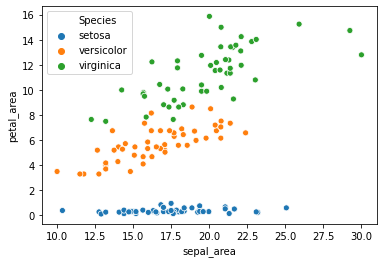

In [5]:
sns.scatterplot(data=iris, y="petal_area", x="sepal_area", hue= "Species")

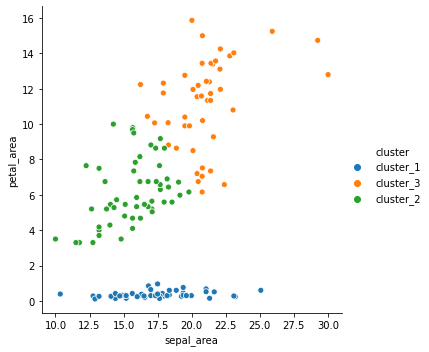

In [6]:
# Modeling
X = iris[["sepal_area", "petal_area"]]
kmeans = KMeans(n_clusters=3).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='sepal_area', y='petal_area', hue='cluster')

Use the elbow method to visually select a good value for k.

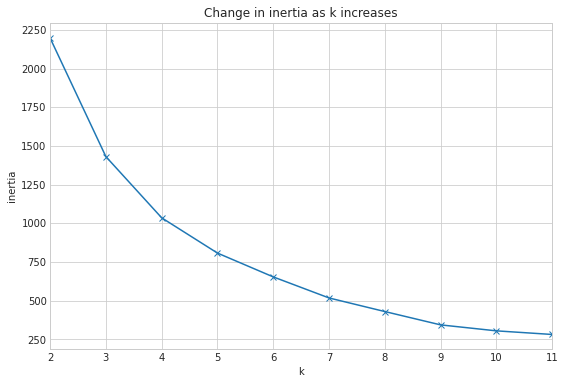

In [7]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Based on the observation above, it seems that the reduction in inertia actually happens sometimes between 3 and 4. 

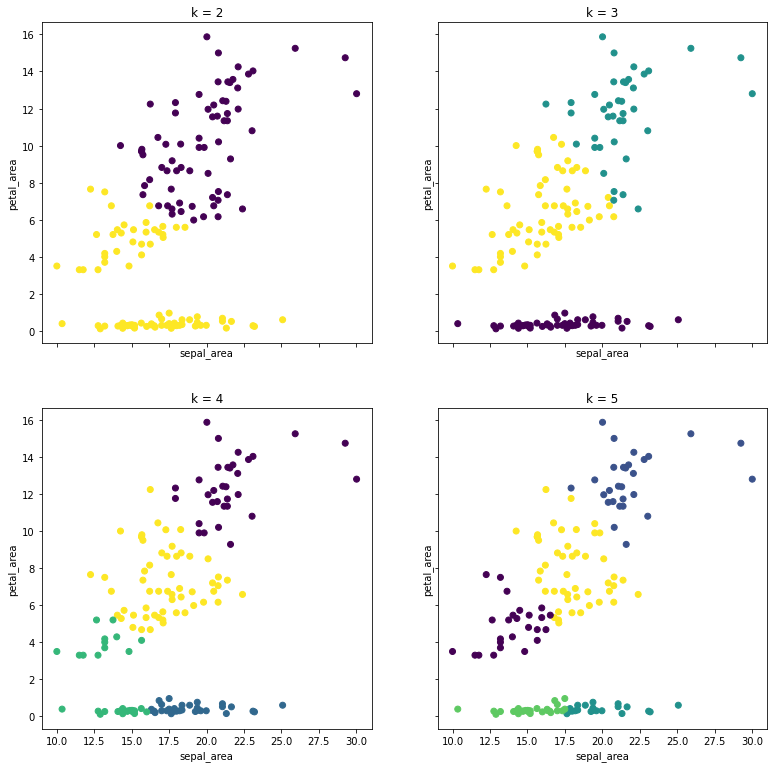

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_area, X.petal_area, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_area', ylabel='petal_area')

Based on the visualization above, it actually seems that 3 is the best option, as k=4 break a clearly distinct group.

### Repeat the clustering, this time with 3 different features.

In [9]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,petal_area,sepal_area,cluster
1,5.1,3.5,1.4,0.2,setosa,0.28,17.85,cluster_1
2,4.9,3.0,1.4,0.2,setosa,0.28,14.70,cluster_1
3,4.7,3.2,1.3,0.2,setosa,0.26,15.04,cluster_1
4,4.6,3.1,1.5,0.2,setosa,0.30,14.26,cluster_1
5,5.0,3.6,1.4,0.2,setosa,0.28,18.00,cluster_1


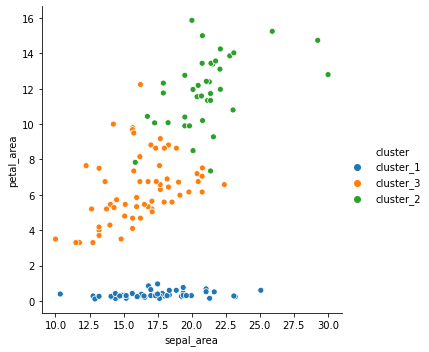

In [10]:
X = iris.drop(columns=["Species", "petal_area", "sepal_area", "cluster"])
kmeans = KMeans(n_clusters=3).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='sepal_area', y='petal_area', hue='cluster')

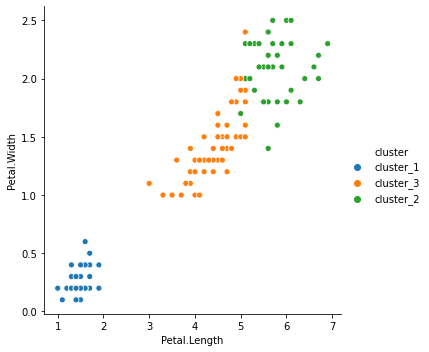

In [11]:
sns.relplot(data=iris, x='Petal.Length', y='Petal.Width', hue='cluster')

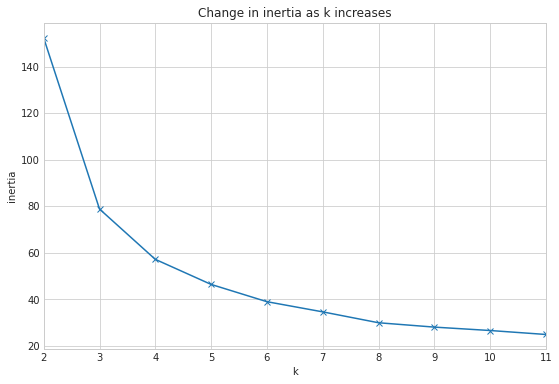

In [12]:
# Now we look at the "elbow curve"

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Again - it seems that the best values for k is either 3 or 4.

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [13]:
from env import sql_database

In [14]:
query = '''

SELECT * 
FROM customers;

'''

data_base_name = "mall_customers"

In [15]:
df = sql_database(data_base_name, query)

In [16]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We will try to clusters the data using only the continous variables (sans "customer_id").

In [17]:
X = df.drop(columns=["customer_id", "gender"])

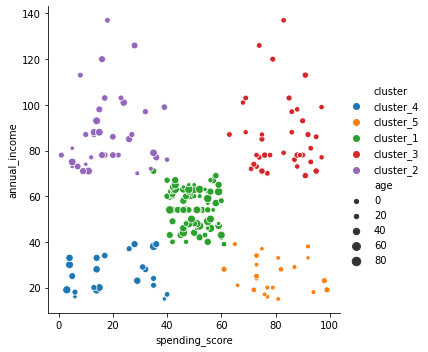

In [18]:
# We will run through the model without scaling the data

kmeans = KMeans(n_clusters=5).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, y='annual_income', x='spending_score', hue='cluster', size="age")

It seems that there are 5 distinct groups when we look at spending score and annual_income. When we added age to the miz, we also see that there are some grouping (older age seems to be in the green group), versus some of the younger customers seem to be more predominant in the orange cluster. Essentially what I deduce from this information is that, if I was working at the mall, our key customers are probably going to be customers of ages between 40 to 50. Customers in the purple group (which might be a mixture of older professionals, still has a high income, but low spending score. This means we should either do targeted ads to get them to spend more, or just assume they won't shop, and focus our efforts on clusters 1, 2 and 5.

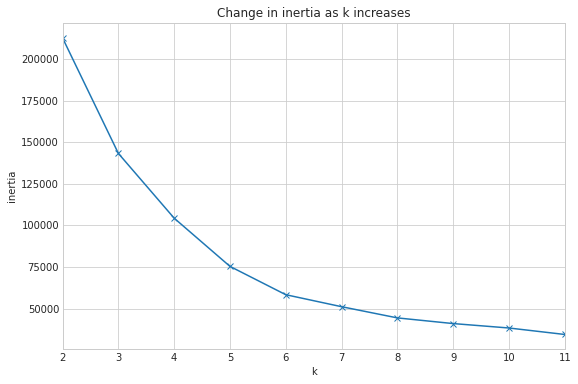

In [19]:
# We will confirm using the "elbow curve"

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

It actually looks like the ideal k value could be anywhere between maybe 3 adn 5.

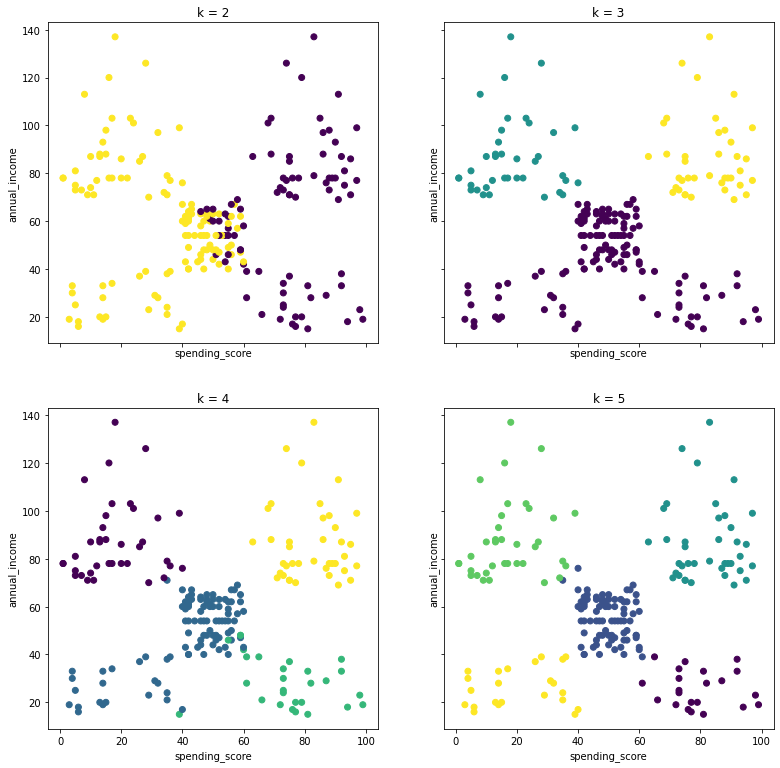

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.spending_score, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

There are some good groupings that could be gathered here. I still think 5 is perhaps the best, but I could actually see k=2 as also being very useful.

# How does scaling impact the results of clustering?

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])

In [23]:
X_scaled

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


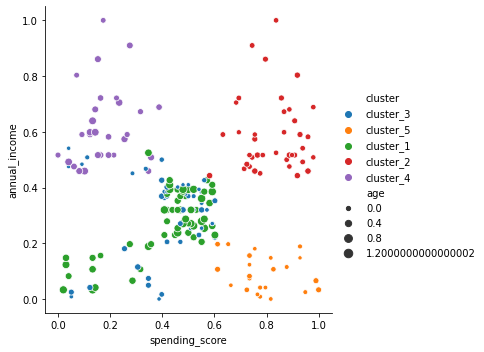

In [24]:
# We will run through the model scaled the data

kmeans = KMeans(n_clusters=5).fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
X_scaled.cluster = 'cluster_' + (X_scaled.cluster + 1).astype('str')
sns.relplot(data=X_scaled, y='annual_income', x='spending_score', hue='cluster', size="age")

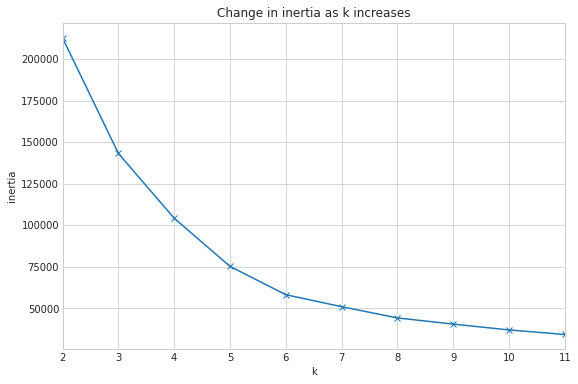

In [25]:
# We will confirm using the "elbow curve"

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

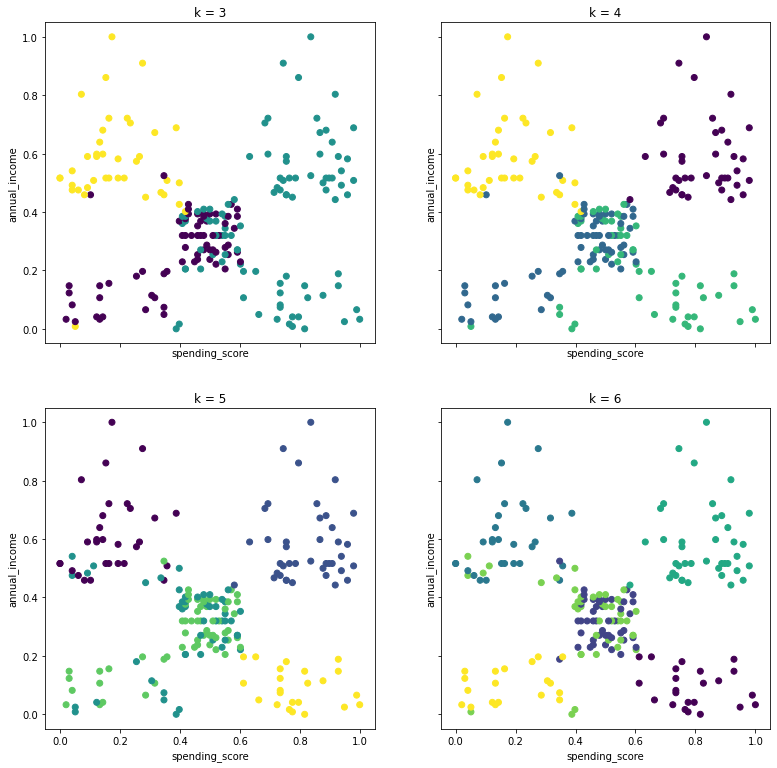

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)
X_scaled = X_scaled.drop(columns="cluster")
for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_scaled.spending_score, X_scaled.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

Interestingly - the data seems now harder to understand, in terms of how customers are being grouped. I suspect that now that annual income has a lower impact (becasue the numbers are scaled) then age and spending score becomes more influential. This could be why the model is having a harder time separating some points. 